In [35]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
url="https://www.kenya-today.com/politics/kenya-election-results-2013"
html=requests.get(url).text

In [3]:
html

'<!DOCTYPE html>\n<html lang="en-US" prefix="og: http://ogp.me/ns#">\n<head>\n<meta charset="UTF-8" />\n<meta name="viewport" content="width=device-width, initial-scale=1" />\n<title>Official Election Results, County By County Tally</title>\n<script>(function(d, s, id){\n\t\t\t\t var js, fjs = d.getElementsByTagName(s)[0];\n\t\t\t\t if (d.getElementById(id)) {return;}\n\t\t\t\t js = d.createElement(s); js.id = id;\n\t\t\t\t js.src = "//connect.facebook.net/en_US/sdk.js#xfbml=1&version=v2.6";\n\t\t\t\t fjs.parentNode.insertBefore(js, fjs);\n\t\t\t   }(document, \'script\', \'facebook-jssdk\'));</script>\n\n<meta name="description" content="Kenya Today|Official election results, 4 march 2013 ID Name Registered Dida, Mohamed Abduba Karua, Martha Wangari Kenneth, Peter Kenyatta, Uhuru Kiyiapi, James" />\n<link rel="canonical" href="https://www.kenya-today.com/politics/kenya-election-results-2013" />\n<meta property="og:locale" content="en_US" />\n<meta property="og:type" content="article" 

In [4]:
soup=BeautifulSoup(html,'html.parser')#

In [5]:
#Pretified version of the website
soup

<!DOCTYPE html>

<html lang="en-US" prefix="og: http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Official Election Results, County By County Tally</title>
<script>(function(d, s, id){
				 var js, fjs = d.getElementsByTagName(s)[0];
				 if (d.getElementById(id)) {return;}
				 js = d.createElement(s); js.id = id;
				 js.src = "//connect.facebook.net/en_US/sdk.js#xfbml=1&version=v2.6";
				 fjs.parentNode.insertBefore(js, fjs);
			   }(document, 'script', 'facebook-jssdk'));</script>
<meta content="Kenya Today|Official election results, 4 march 2013 ID Name Registered Dida, Mohamed Abduba Karua, Martha Wangari Kenneth, Peter Kenyatta, Uhuru Kiyiapi, James" name="description"/>
<link href="https://www.kenya-today.com/politics/kenya-election-results-2013" rel="canonical"/>
<meta content="en_US" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta content="Official Election Results, County

In [6]:
tables=soup.findAll('table')#Used to scrap all data relating to table

In [7]:
tables

[<table border="1" cellpadding="0" width="760">
 <thead>
 <tr>
 <td valign="bottom">ID</td>
 <td valign="bottom">Name</td>
 <td valign="bottom">Registered</td>
 <td valign="bottom">Dida, Mohamed Abduba</td>
 <td valign="bottom">Karua, Martha Wangari</td>
 <td valign="bottom">Kenneth, Peter</td>
 <td valign="bottom">Kenyatta, Uhuru</td>
 <td valign="bottom">Kiyiapi, James Legilisho</td>
 <td valign="bottom">Mudavadi, Musalia</td>
 <td valign="bottom">Muite, Paul Kibugi</td>
 <td valign="bottom">Odinga, Raila</td>
 <td valign="bottom">Total</td>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td valign="top">01</td>
 <td valign="top">Mombasa</td>
 <td valign="top">408,747</td>
 <td valign="top">5,695</td>
 <td valign="top">748</td>
 <td valign="top">3,028</td>
 <td valign="top">64,793</td>
 <td valign="top">421</td>
 <td valign="top">4,500</td>
 <td valign="top">144</td>
 <td valign="top">189,985</td>
 <td valign="top">269,314</td>
 </tr>
 <tr>
 <td valign="top">02</td>
 <td valign="top">Kwale</td>
 <

In [8]:
rows=tables[0].find_all('tr')#Used for subsets data

In [9]:
rows[0]

<tr>
<td valign="bottom">ID</td>
<td valign="bottom">Name</td>
<td valign="bottom">Registered</td>
<td valign="bottom">Dida, Mohamed Abduba</td>
<td valign="bottom">Karua, Martha Wangari</td>
<td valign="bottom">Kenneth, Peter</td>
<td valign="bottom">Kenyatta, Uhuru</td>
<td valign="bottom">Kiyiapi, James Legilisho</td>
<td valign="bottom">Mudavadi, Musalia</td>
<td valign="bottom">Muite, Paul Kibugi</td>
<td valign="bottom">Odinga, Raila</td>
<td valign="bottom">Total</td>
</tr>

In [10]:
#Obtaining the data
data=[]
for row in rows:
    cols=row.find_all('td')
    record=[col.text for col in cols]
    data.append(record)
  

In [11]:
#Converting into a dataframe
df=pd.DataFrame(data[1:-2],columns=data[0])

In [12]:
df.head()

,ID,Name,Registered,"Dida, Mohamed Abduba","Karua, Martha Wangari","Kenneth, Peter","Kenyatta, Uhuru","Kiyiapi, James Legilisho","Mudavadi, Musalia","Muite, Paul Kibugi","Odinga, Raila",Total
0,01,Mombasa,"408,747","5,695",748,"3,028","64,793",421,"4,500",144,"189,985","269,314"
1,02,Kwale,"174,443",631,970,"1,603","17,633",653,"1,492",237,"101,407","124,626"
2,03,Kilifi,"336,132","1,518","1,771","1,877","23,386","1,691","2,397",444,"182,708","215,792"
3,04,Tana River,"79,454",674,227,362,"22,419",204,457,71,"39,666","64,080"
4,05,Lamu,"52,346","1,692",81,250,"17,677",127,688,57,"22,962","43,534"


In [13]:
df.dtypes

ID                          object
Name                        object
Registered                  object
Dida, Mohamed Abduba        object
Karua, Martha Wangari       object
Kenneth, Peter              object
Kenyatta, Uhuru             object
Kiyiapi, James Legilisho    object
Mudavadi, Musalia           object
Muite, Paul Kibugi          object
Odinga, Raila               object
Total                       object
dtype: object

In [14]:
df['Kenyatta, Uhuru'].head()

0    64,793
1    17,633
2    23,386
3    22,419
4    17,677
Name: Kenyatta, Uhuru, dtype: object

In [15]:
#Data cleaning to remove commas
df['Registered']=df['Registered'].str.replace(",","").astype(int)#Registered voters
df['Total']=df['Total'].str.replace(",","").astype(int)#Votes cast
df['Kenyatta, Uhuru']=df['Kenyatta, Uhuru'].str.replace(",","").astype(int)
df['Odinga, Raila']=df['Odinga, Raila'].str.replace(",","").astype(int)

In [16]:
df['Odinga, Raila'].head()

0    189985
1    101407
2    182708
3     39666
4     22962
Name: Odinga, Raila, dtype: int32

In [17]:
#Compute voters turn out
df['turn out']=df['Total']/df['Registered']*100

#Compute votes per candidate
df['UMK votes']=df['Kenyatta, Uhuru']/df['Total']*100
df['RAO votes']=df['Odinga, Raila']/df['Total']*100

In [18]:
df[['Name','RAO votes','UMK votes','turn out']].sample(10)

,Name,RAO votes,UMK votes,turn out
3,Tana River,61.900749,34.985955,80.650439
8,Mandera,4.311205,93.247820,83.855823
20,Murang’a,2.447761,96.451554,93.031108
40,Siaya,99.064915,0.308323,91.918735
29,Baringo,9.481353,88.576198,90.035300
32,Narok,50.637758,46.706196,89.159965
44,Kisii,68.833415,27.784366,83.319570
42,Homa Bay,99.274044,0.237187,93.812648
22,Turkana,67.808002,29.972441,75.912255
4,Lamu,52.744981,40.605044,83.165858


In [19]:
import geopandas as gpd

In [20]:
shp=gpd.read_file('D:\\resources\\Digital Academy\\Python\GIS\\Shapefile\\ke_county.shp',figsize=(12,9))

C:\Users\mnmureithi\AppData\Local\Continuum\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


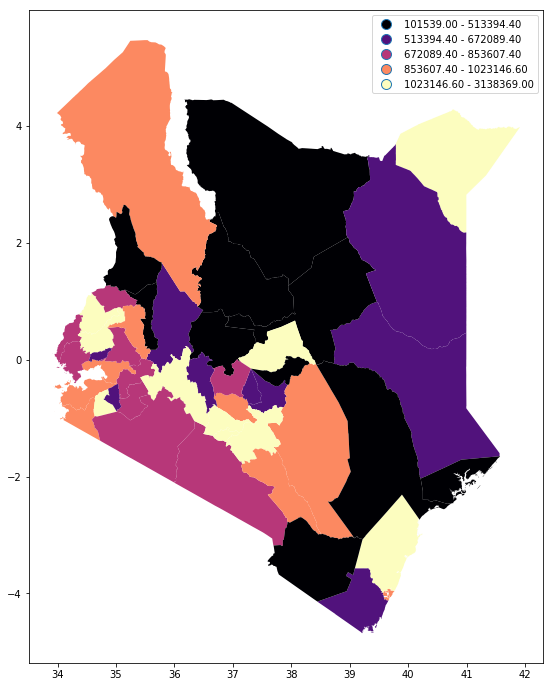

In [21]:
%matplotlib inline
shp.plot(linewidth=0.1,column='pop 2009',cmap='magma',legend=True,k=5,scheme='QUANTILES',figsize=(12,12))

In [22]:
shp[['county','pop 2009']].head()

,county,pop 2009
0,Baringo,555561
1,Murang'a,942581
2,Bomet,730129
3,Bungoma,1375063
4,Busia,743082


In [23]:
df[['Name','UMK votes','RAO votes']].sort_values('Name').head(10)

,Name,UMK votes,RAO votes
29,Baringo,88.576198,9.481353
35,Bomet,93.260468,4.635533
38,Bungoma,12.435095,53.635967
39,Busia,3.743780,86.510775
27,Elgeyo / Marakwet,92.835619,4.894123
13,Embu,89.772532,8.039693
6,Garissa,45.601979,48.941805
42,Homa Bay,0.237187,99.274044
10,Isiolo,55.747709,29.790109
33,Kajiado,52.768974,44.790028


In [24]:
import difflib

In [25]:
shp['Name']=shp['county'].map(lambda x:difflib.get_close_matches(x, df['Name'])[0])

In [26]:
shp.head()

,gid,county,pop 2009,lf_endemic,country,counts,var1_class,hiv_class,hiv_his_cl,cuid,geometry,Name
0,1,Baringo,555561,No,Kenya,2,2,A,A2,vvOK1BxTbet,"POLYGON ((35.78413003162505 1.652483862137646,...",Baringo
1,29,Murang'a,942581,No,Kenya,1,2,B,B2,ahwTMNAJvrL,(POLYGON ((37.14475029160634 -1.05031012815712...,Murang’a
2,2,Bomet,730129,No,Kenya,1,2,A,A2,HMNARUV2CW4,"POLYGON ((35.45191774949814 -0.36477354274942,...",Bomet
3,3,Bungoma,1375063,No,Kenya,1,3,B,B3,KGHhQ5GLd4k,"POLYGON ((34.62083036980981 1.099421636425453,...",Bungoma
4,4,Busia,743082,No,Kenya,1,2,C,C2,Tvf1zgVZ0K4,(POLYGON ((33.91368549186415 0.098257528656488...,Busia


In [27]:
df.head()

,ID,Name,Registered,"Dida, Mohamed Abduba","Karua, Martha Wangari","Kenneth, Peter","Kenyatta, Uhuru","Kiyiapi, James Legilisho","Mudavadi, Musalia","Muite, Paul Kibugi","Odinga, Raila",Total,turn out,UMK votes,RAO votes
0,01,Mombasa,408747,"5,695",748,"3,028",64793,421,"4,500",144,189985,269314,65.887701,24.058534,70.544049
1,02,Kwale,174443,631,970,"1,603",17633,653,"1,492",237,101407,124626,71.442248,14.148733,81.369056
2,03,Kilifi,336132,"1,518","1,771","1,877",23386,"1,691","2,397",444,182708,215792,64.198589,10.837288,84.668570
3,04,Tana River,79454,674,227,362,22419,204,457,71,39666,64080,80.650439,34.985955,61.900749
4,05,Lamu,52346,"1,692",81,250,17677,127,688,57,22962,43534,83.165858,40.605044,52.744981


In [28]:
df1=pd.merge(shp,df, on=['Name'])

In [29]:
df1.head()

,gid,county,pop 2009,lf_endemic,country,counts,var1_class,hiv_class,hiv_his_cl,cuid,...,"Kenneth, Peter","Kenyatta, Uhuru","Kiyiapi, James Legilisho","Mudavadi, Musalia","Muite, Paul Kibugi","Odinga, Raila",Total,turn out,UMK votes,RAO votes
0,1,Baringo,555561,No,Kenya,2,2,A,A2,vvOK1BxTbet,...,520,138488,446,"1,201",156,14824,156349,90.035300,88.576198,9.481353
1,29,Murang'a,942581,No,Kenya,1,2,B,B2,ahwTMNAJvrL,...,"1,811",406334,779,601,187,10312,421283,93.031108,96.451554,2.447761
2,2,Bomet,730129,No,Kenya,1,2,A,A2,HMNARUV2CW4,...,"1,503",210501,874,"1,092",207,10463,225713,89.441587,93.260468,4.635533
3,3,Bungoma,1375063,No,Kenya,1,3,B,B3,KGHhQ5GLd4k,...,"1,862",42988,"2,601","107,868",965,185419,345699,84.221926,12.435095,53.635967
4,4,Busia,743082,No,Kenya,1,2,C,C2,Tvf1zgVZ0K4,...,680,8186,769,"18,608",224,189161,218656,87.008217,3.743780,86.510775


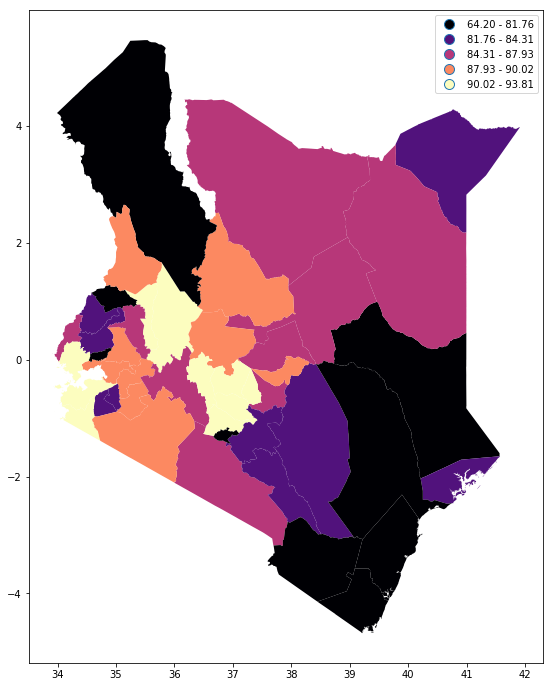

In [30]:
#Voter turnout
%matplotlib inline
df1.plot(linewidth=0.1,column='turn out',cmap='magma',legend=True,k=5,scheme='QUANTILES',figsize=(12,12))

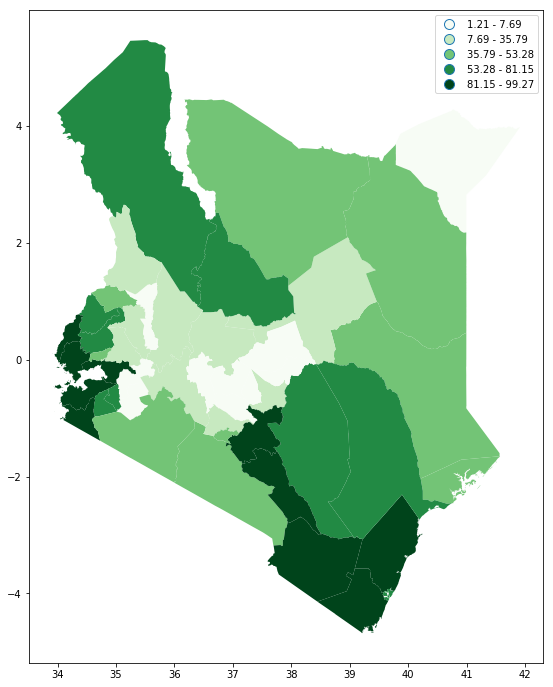

In [31]:
#Raila's strong zones
%matplotlib inline
#df1.plot(linewidth=0.1,column='UMK votes',cmap='Blues',legend=True,k=5,scheme='QUANTILES',figsize=(12,12))
df1.plot(linewidth=0.1,column='RAO votes',cmap='Greens',legend=True,k=5,scheme='QUANTILES',figsize=(12,12))

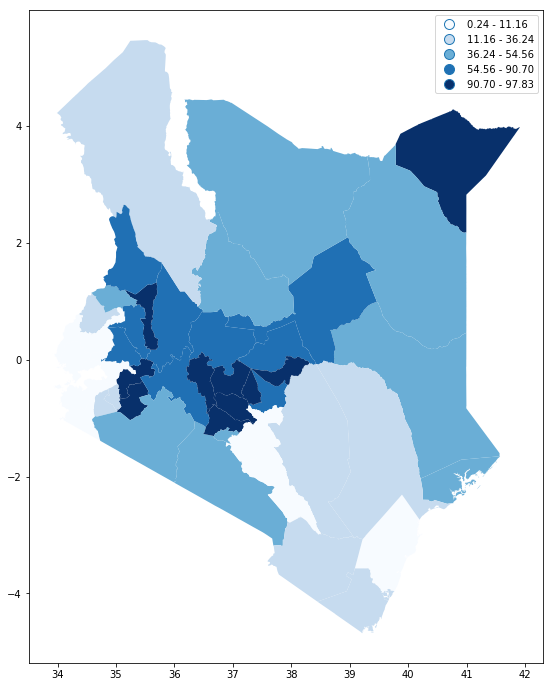

In [32]:
#Uhuru's strong zones
%matplotlib inline
df1.plot(linewidth=0.1,column='UMK votes',cmap='Blues',legend=True,k=5,scheme='QUANTILES',figsize=(12,12))

In [33]:
#Tallying of data per the main candidates
Tally=[]
for x,y in zip(df1['RAO votes'],df1['UMK votes']):
    if x > y:
        k='RAILA'
        Tally.append(k)
    else:
        k='UHURU'
        Tally.append(k)
df1['WINS']=Tally

Text(0.5, 1.0, 'UHURU VS RAILA 2013 ELECTION OUTCOME')

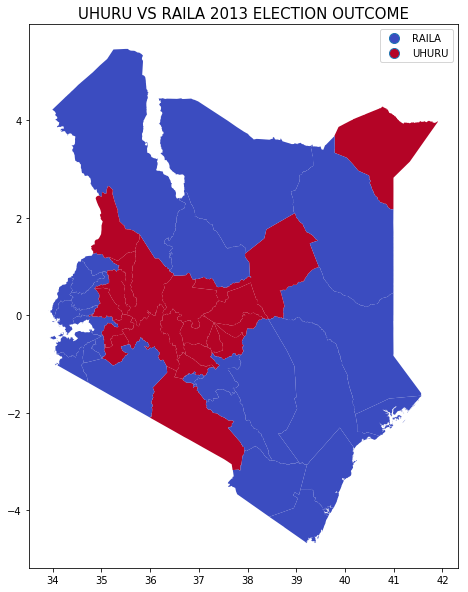

In [36]:
df1.plot(column='WINS',figsize=(15,10),legend=True,cmap='coolwarm')
plt.title('UHURU VS RAILA 2013 ELECTION OUTCOME',fontsize=15)